In [ ]:
import tensorflow as tf
import cv2
import os
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

Checking Whether all the libraries are imported without any errors

In [ ]:
 img_array =cv2.imread("/content/drive/MyDrive/Mask/Dataset/train/n95/0.jpg")

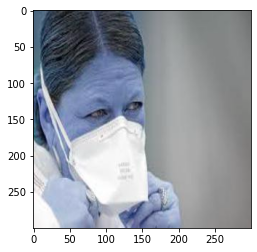

In [ ]:
plt.imshow(img_array)

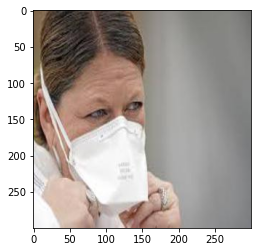

In [ ]:
plt.imshow(cv2.cvtColor(img_array,cv2.COLOR_BGR2RGB))

In [ ]:
img_array.shape

(300, 300, 3)

Loading and Categorising all the trainging images of the dataset into the respective classes

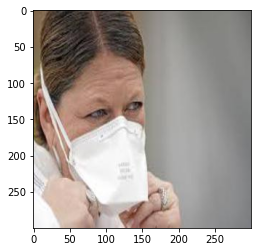

In [ ]:
Datadirectory = "/content/drive/MyDrive/Mask/Dataset/train/"
Classes = ["n95","srg","n95v","cloth","nfm"]#,"p100","bandanas"
for category in Classes:
    path=os.path.join(Datadirectory,category)
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path,img))
        plt.imshow(cv2.cvtColor(img_array,cv2.COLOR_BGR2RGB))
        plt.show()
        break
    break    

Read all the images and converting them into array

In [ ]:
img_size=224

training_Data = []


def create_training_Data():
    for category in Classes:
        path = os.path.join(Datadirectory,category)
        class_num = Classes.index(category)
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path,img))
                new_array = cv2.resize(img_array,(img_size,img_size))
                training_Data.append([new_array,class_num])
            except Exception as e:
                pass

In [ ]:
create_training_Data()

In [ ]:
print(len(training_Data))

1956


In [ ]:
import random

random.shuffle(training_Data)

In [ ]:
X = []
y = []
for features,label in training_Data:
    X.append(features)
    y.append(label)

X = np.array(X).reshape(-1,img_size ,img_size,3)

In [ ]:
X.shape

(1956, 224, 224, 3)

In [ ]:
X = X/255.0; #normalize

In [ ]:
Y =np.array(y)

In [ ]:
Y.shape

(1956,)

In [ ]:
Y

array([1, 4, 3, ..., 4, 2, 1])

In [ ]:
training_datagen = ImageDataGenerator(

    rescale = 1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    target_size=(224,224),
    fill_mode='nearest')

# training_datagen.fit(X)


In [ ]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(X,Y,train_size=0.8,random_state=0)

In [ ]:
model = tf.keras.applications.

14548992/14536120 [==============================] - 0s 0us/step


In [ ]:
model.summary()

Model: "mobilenetv2_1.00_224"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 Conv1 (Conv2D)                 (None, 112, 112, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, 112, 112, 32  128         ['Conv1[0][0]']                  
                                )                                              

In [ ]:
base_input = model.layers[0].input

In [ ]:
base_output = model.layers[-2].output

In [ ]:
base_output

<KerasTensor: shape=(None, 1280) dtype=float32 (created by layer 'global_average_pooling2d')>

In [ ]:
final_output = layers.Dense(128)(base_output)
final_output = layers.Activation('relu')(final_output)
final_output = layers.Dense(64)(final_output)
final_output = layers.Activation('relu')(final_output)
final_output = layers.Dense(5,activation='softmax')(final_output)

In [ ]:
final_output

<KerasTensor: shape=(None, 5) dtype=float32 (created by layer 'dense_2')>

In [ ]:
new_model = keras.Model(inputs = base_input , outputs=final_output)

In [ ]:
new_model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 Conv1 (Conv2D)                 (None, 112, 112, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, 112, 112, 32  128         ['Conv1[0][0]']                  
                                )                                                             

In [ ]:
new_model.compile(loss="sparse_categorical_crossentropy",optimizer="sgd",metrics=["accuracy"])

In [ ]:
history = new_model.fit(xtrain,ytrain,epochs=10,batch_size=32,validation_data=(xtest,ytest))

Epoch 1/10
49/49 [==============================] - 25s 263ms/step - loss: 1.0624 - accuracy: 0.5965 - val_loss: 0.8943 - val_accuracy: 0.6020
Epoch 2/10
49/49 [==============================] - 11s 215ms/step - loss: 0.3899 - accuracy: 0.8958 - val_loss: 0.5989 - val_accuracy: 0.7704
Epoch 3/10
49/49 [==============================] - 11s 218ms/step - loss: 0.1760 - accuracy: 0.9572 - val_loss: 0.5335 - val_accuracy: 0.8061
Epoch 4/10
49/49 [==============================] - 11s 219ms/step - loss: 0.0792 - accuracy: 0.9885 - val_loss: 0.3942 - val_accuracy: 0.8546
Epoch 5/10
49/49 [==============================] - 11s 217ms/step - loss: 0.0487 - accuracy: 0.9923 - val_loss: 0.4034 - val_accuracy: 0.8495
Epoch 6/10
49/49 [==============================] - 11s 218ms/step - loss: 0.0269 - accuracy: 0.9994 - val_loss: 0.3609 - val_accuracy: 0.8673
Epoch 7/10
49/49 [==============================] - 11s 218ms/step - loss: 0.0225 - accuracy: 0.9987 - val_loss: 0.3589 - val_accuracy: 0.8648

In [ ]:
new_model.evaluate(xtrain,ytrain)

49/49 [==============================] - 2s 46ms/step - loss: 0.1286 - accuracy: 0.9495


[0.12860864400863647, 0.9494885206222534]

In [ ]:
new_model.evaluate(xtest,ytest)

13/13 [==============================] - 1s 42ms/step - loss: 0.3619 - accuracy: 0.8673


[0.3619058430194855, 0.8673469424247742]

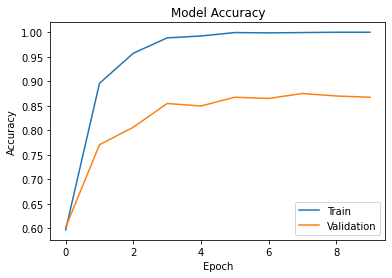

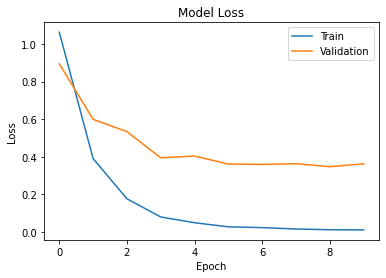

In [ ]:


import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc=0)
plt.show()


plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc=0)
plt.show()
